In [38]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calplot
from matplotlib.ticker import FuncFormatter

In [2]:
# Load combined_df.pkl as a pandas dataframe called df
df = pd.read_pickle('../../combined_df.pkl')

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year
focuscrime_df['Year'].unique()

array([2004, 2005, 2010, 2013, 2017, 2016, 2006, 2009, 2012, 2003, 2007,
       2008, 2011, 2015, 2014, 2023, 2019, 2020, 2021, 2018, 2022, 2024,
       2025], dtype=int32)

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

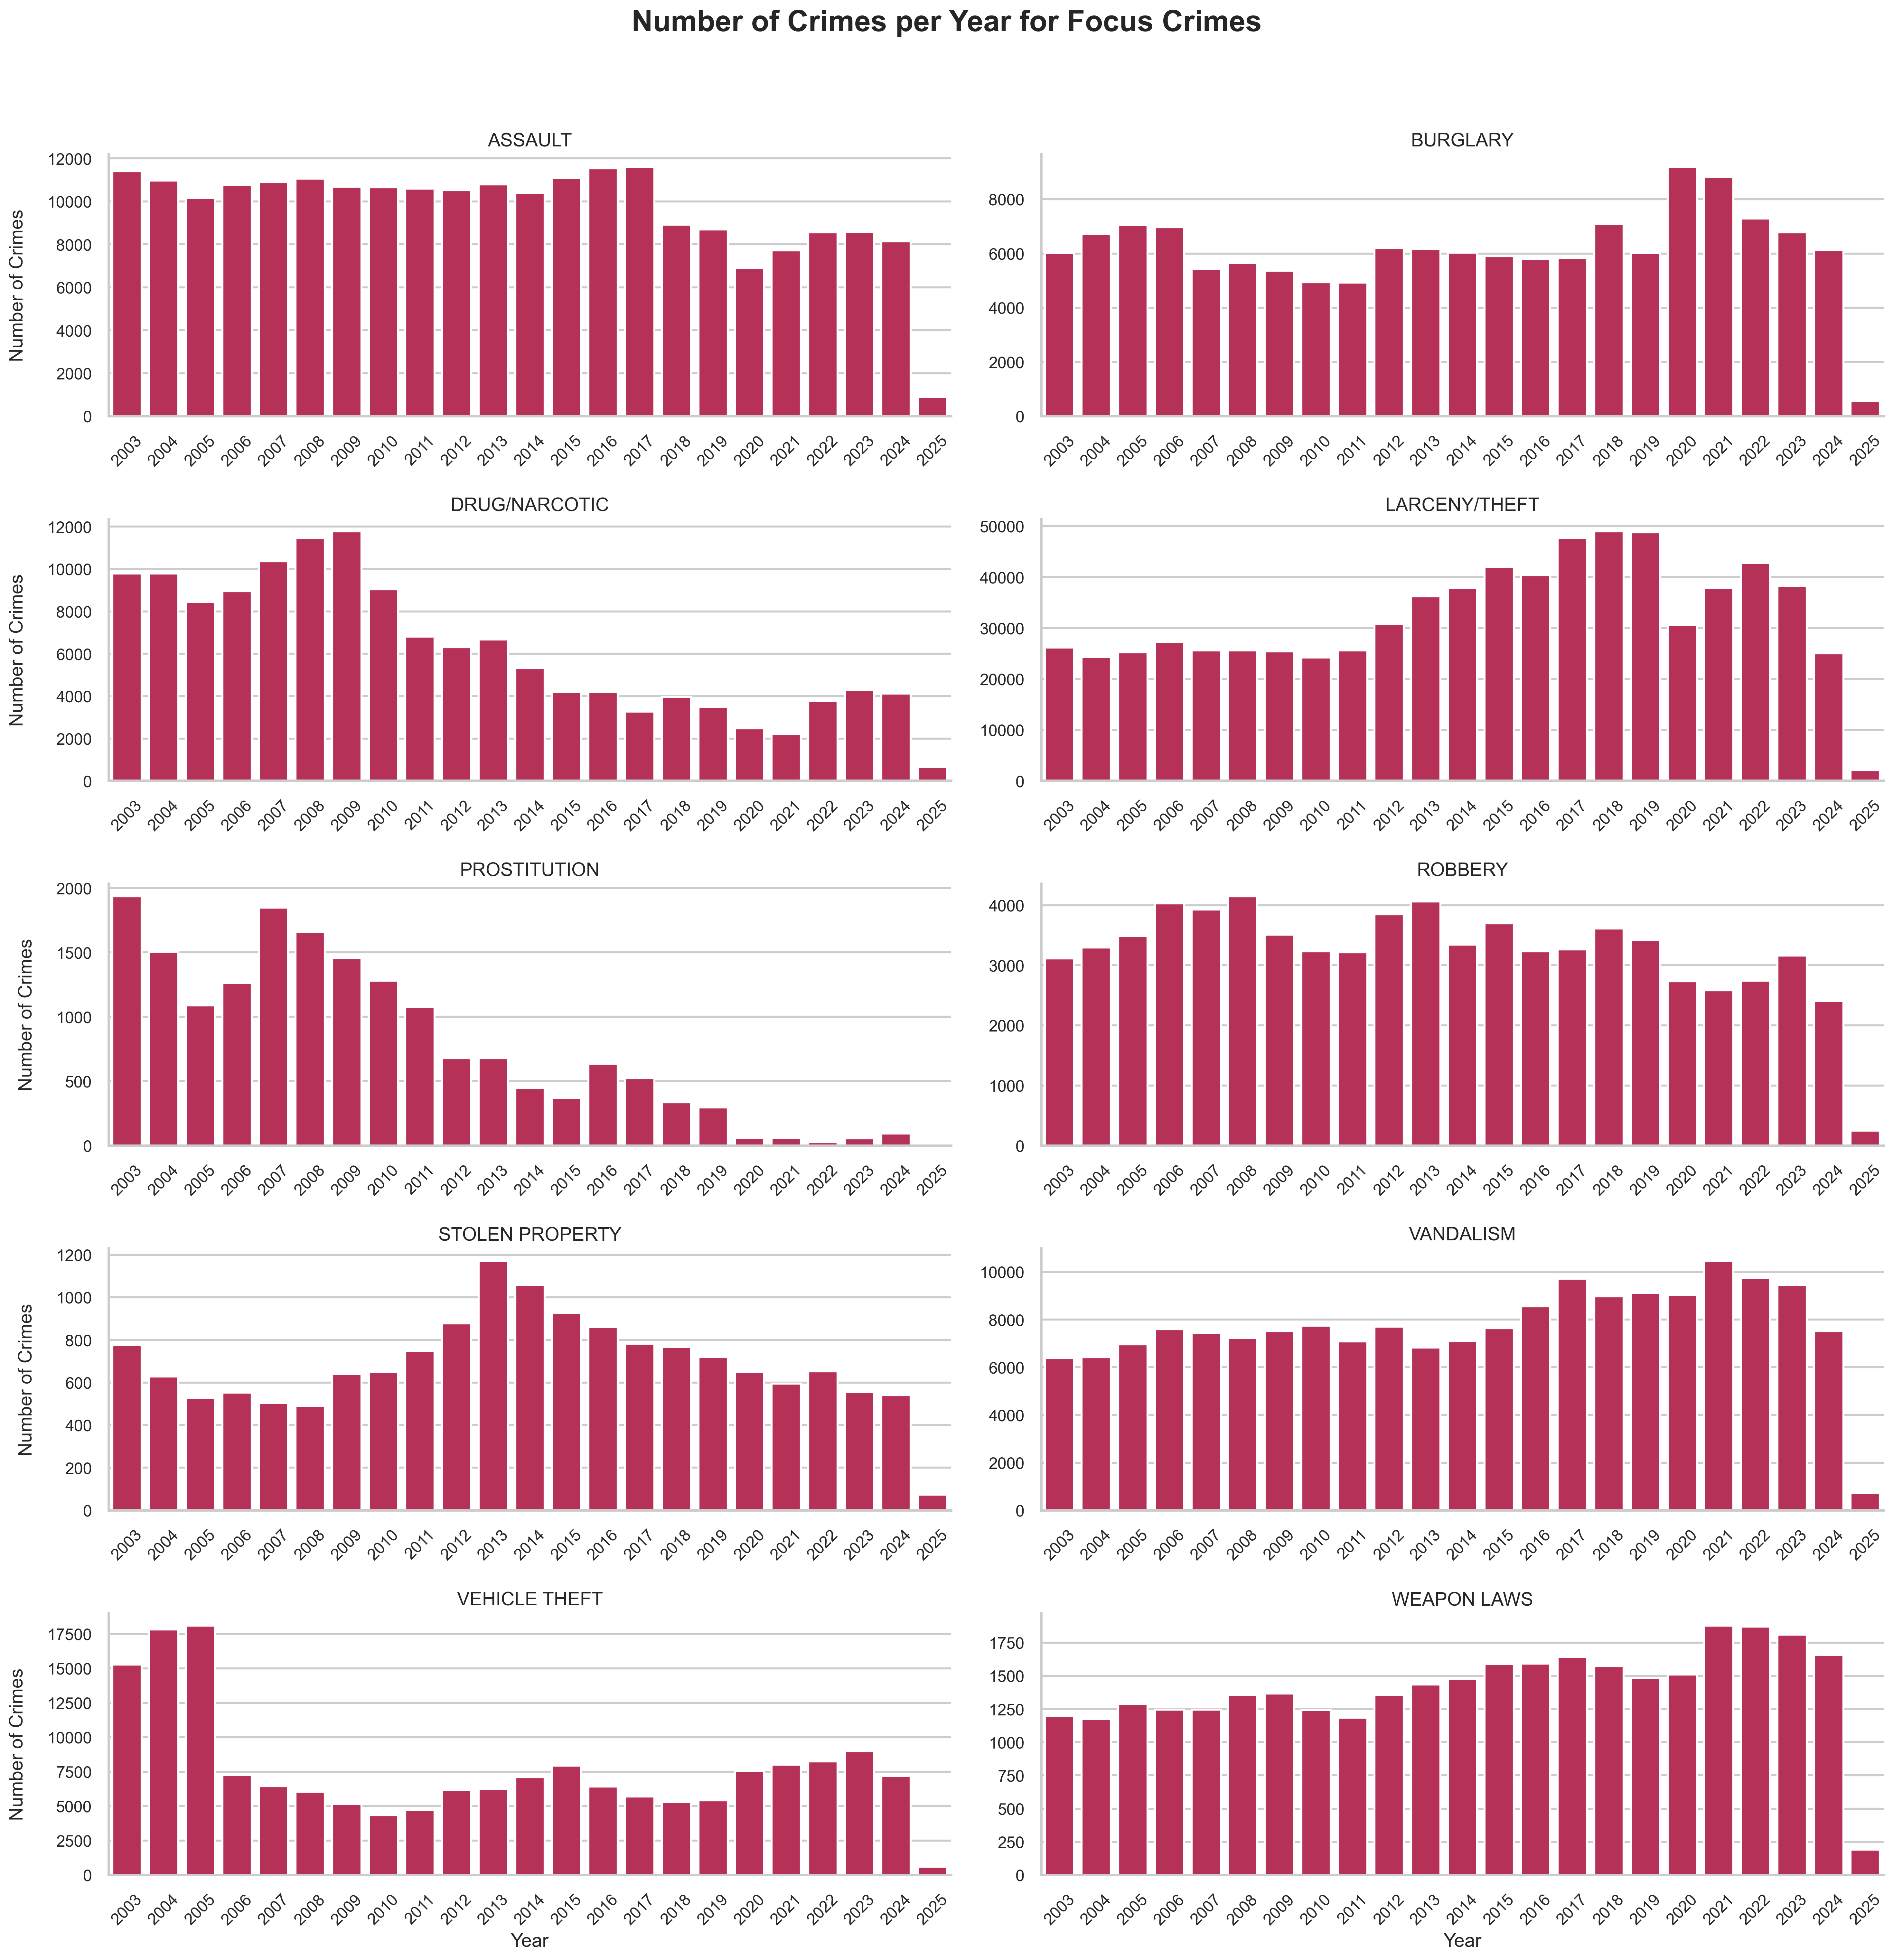

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Increase overall DPI for high-resolution rendering in notebooks
plt.rcParams['figure.dpi'] = 300

# Set context for talk-like presentation and update font settings
sns.set_context("talk", font_scale=1.1)
sns.set_style("whitegrid")  # Optional: use a clean grid style
plt.rcParams.update({
    'font.family': 'Arial',  # Optional: change font family for publications
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame to only include focus crimes
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
               'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'}
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()

# Extract the year from the 'Date' column
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

# Group by 'Category' and 'Year' and count occurrences
crime_counts = (focuscrime_df.groupby(['Category', 'Year'])
                .size()
                .reset_index(name='Count'))

# Create a facet grid with free y-axis for each facet
g = sns.FacetGrid(crime_counts, col="Category", col_wrap=2, height=4, aspect=2.5, sharey=False, sharex=False)

# Extract a single color from the 'rocket' palette
rocket_color = sns.color_palette("rocket", 1)[0]

# Map a barplot to each facet
g.map_dataframe(sns.barplot, x="Year", y="Count", color=rocket_color)

# Customize axis labels and facet titles
g.set_axis_labels("Year", "Number of Crimes")
g.set_titles("{col_name}")

# Adjust spacing for y-axis label and tick labels
for ax in g.axes.flat:
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', labelsize=12)
    # Rotate x-axis labels for readability
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    # Remove top and right spines for a cleaner look
    sns.despine(ax=ax)

# Add a main title for the entire figure
g.fig.suptitle("Number of Crimes per Year for Focus Crimes", fontsize=22, fontweight='bold', y=1.02)

# Tight layout to prevent overlaps
plt.tight_layout()

# Optionally, save the figure as a high-resolution image
#g.savefig("publication_quality_plot.png", dpi=300, bbox_inches="tight")

plt.show()


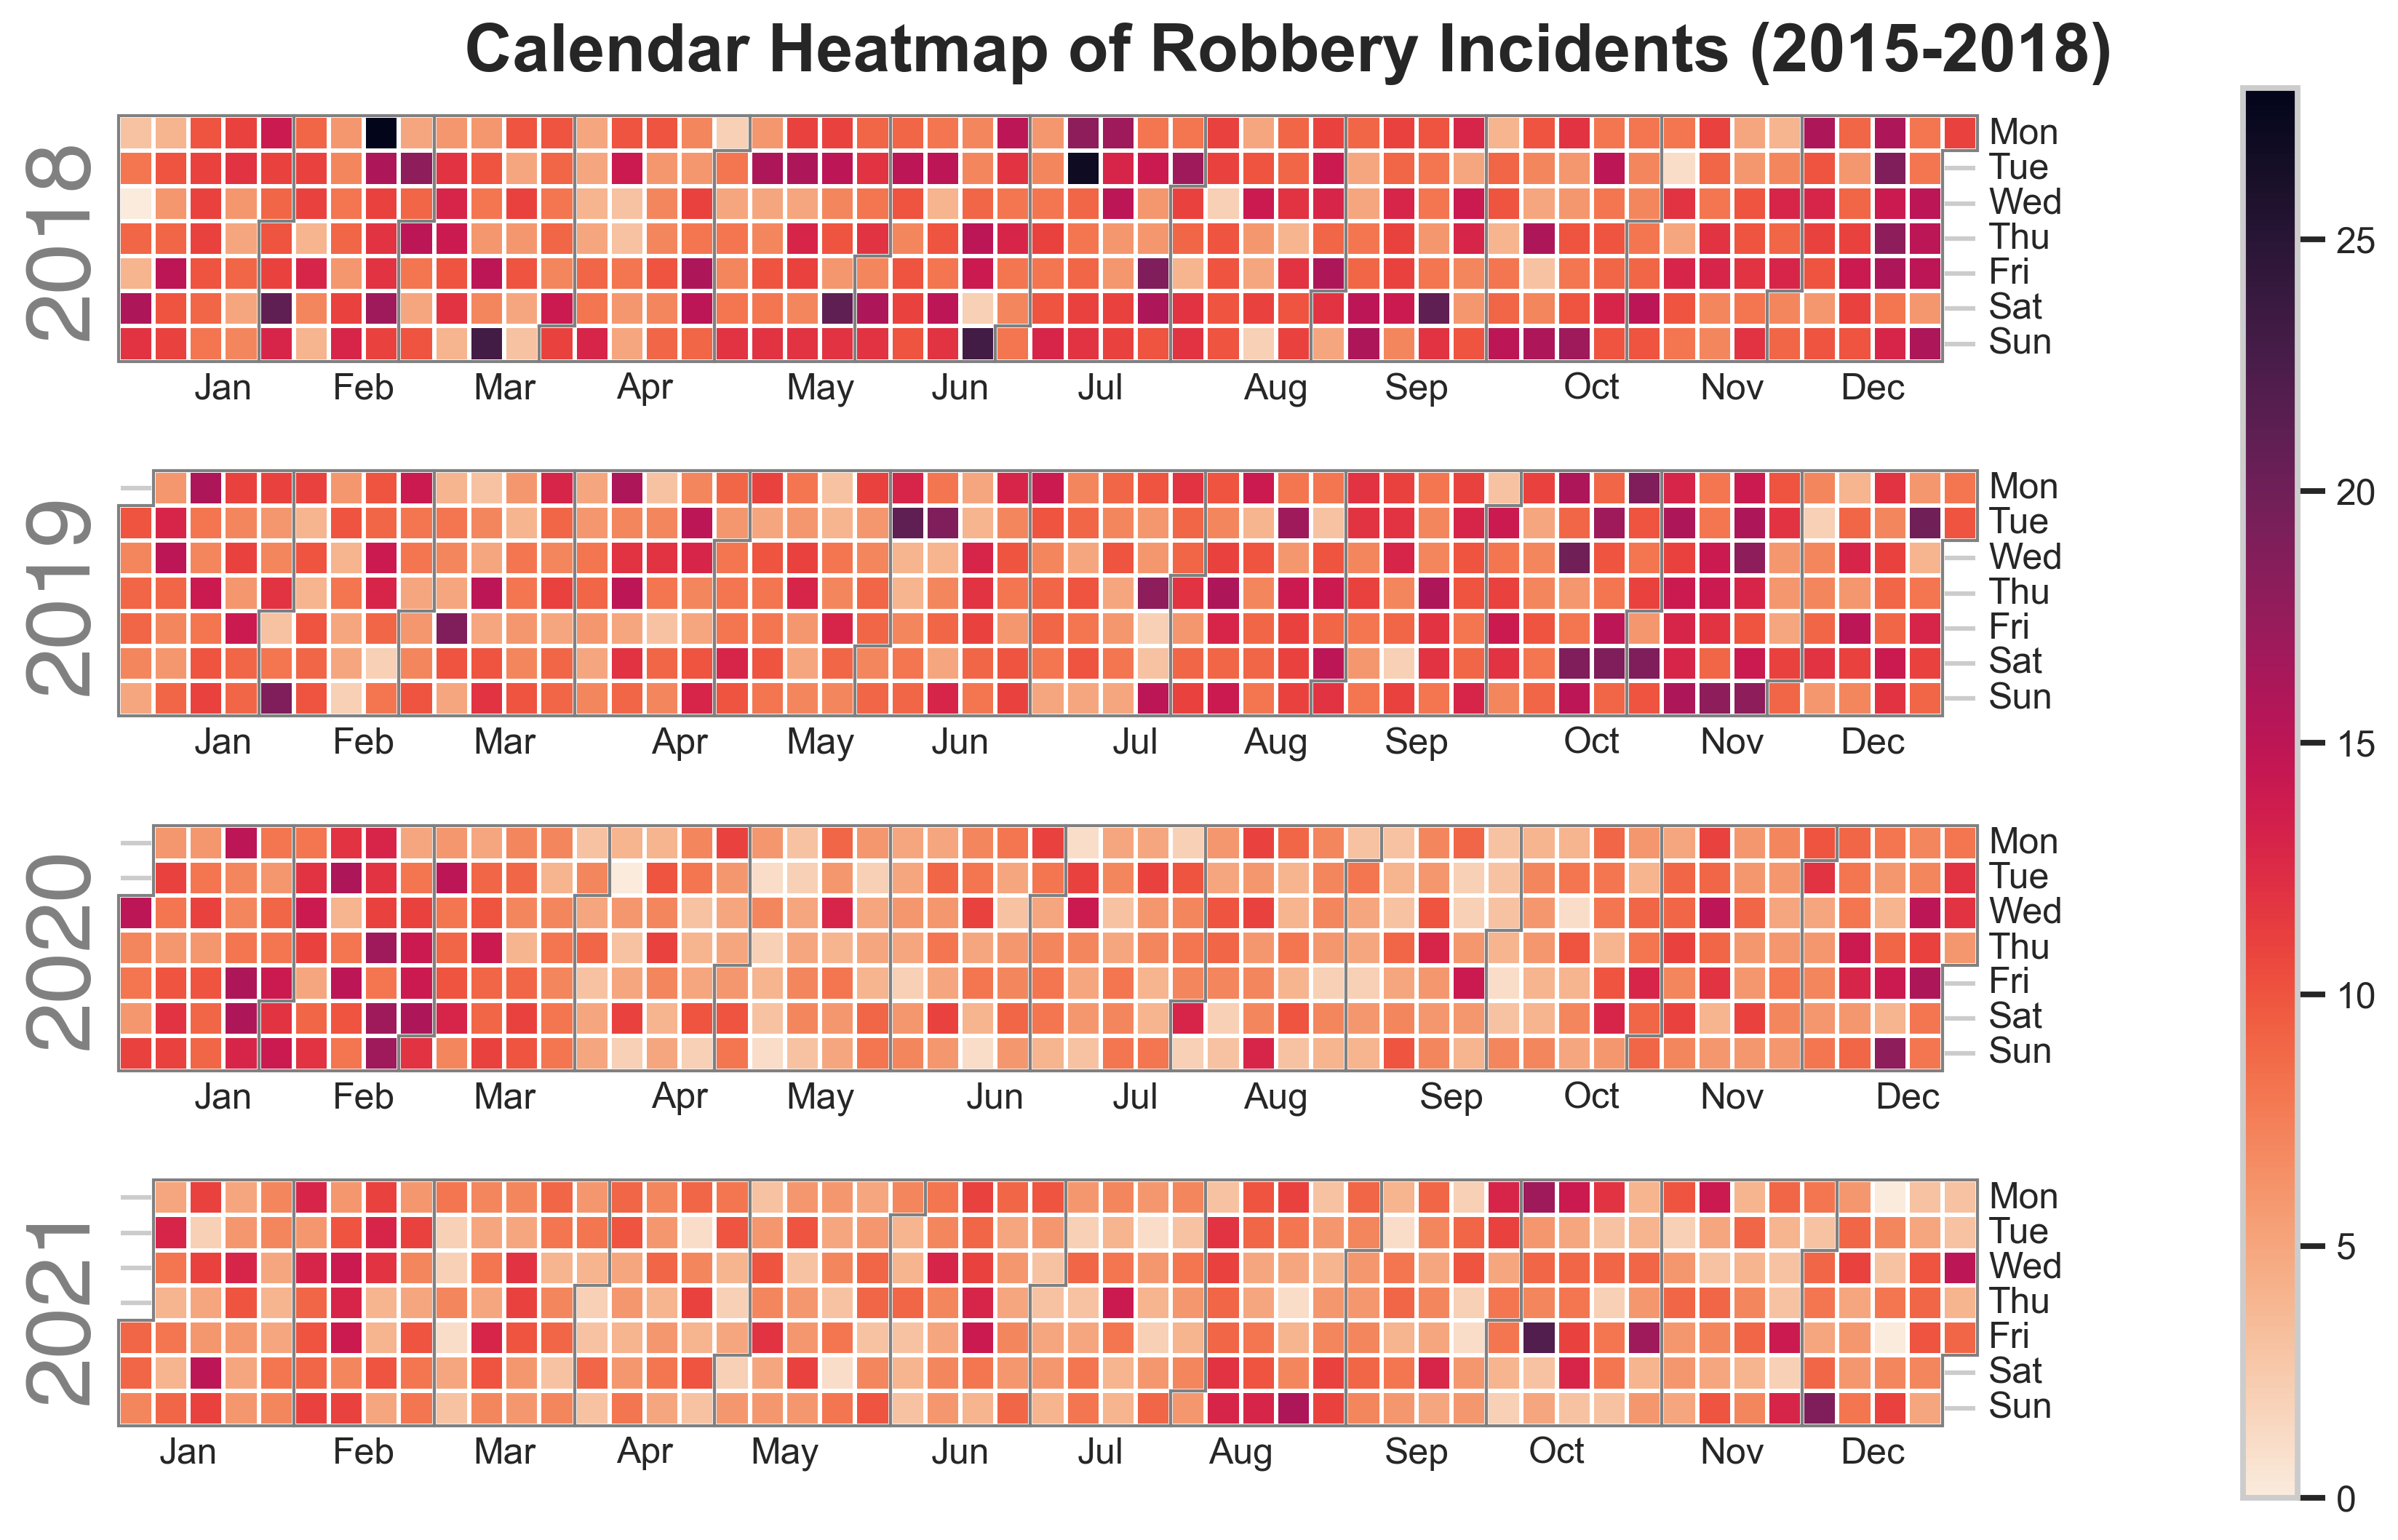

In [16]:
# --- Global plot configurations ---
plt.rcParams['figure.dpi'] = 300  # High-resolution rendering

sns.set_context("talk", font_scale=1.1)  # Talk-like, publication-quality context
sns.set_style("whitegrid")              # White grid style for clarity

plt.rcParams.update({
    'font.family': 'Arial',       # Global font
    'axes.labelsize': 14,         # Axis label size
    'xtick.labelsize': 12,        # X-tick label size
    'ytick.labelsize': 12         # Y-tick label size
})

# Consistent color extraction from the 'rocket' palette
rocket_color = sns.color_palette("rocket")

# --- Data preparation ---
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter for 'ROBBERY' category and for dates between 2015 and 2018
robbery_df = df[(df['Category'] == 'ROBBERY') &
                (df['Date'] >= '2018-01-01') &
                (df['Date'] <= '2021-12-31')].copy()

# Group by the date (ignoring time) and count occurrences per day
robbery_daily = robbery_df.groupby(robbery_df['Date'].dt.date).size()

# Convert the index to datetimex for calplot compatibility
robbery_daily.index = pd.to_datetime(robbery_daily.index)

# --- Create a rocket colormap using Seaborn ---
rocket_cmap = sns.color_palette("rocket_r", as_cmap=True)

# --- Plotting with calplot ---
calplot.calplot(
    robbery_daily,
    cmap=rocket_cmap
)

# Add an overall title with the specified formatting
plt.suptitle("Calendar Heatmap of Robbery Incidents (2015-2018)",
             fontsize=22, fontweight='bold', y=1.02)

plt.show()

In [19]:
df

Category       Date   Time PdDistrict           X           Y  \
0              ROBBERY 2004-11-22  17:50  INGLESIDE -122.420084   37.708311   
1        VEHICLE THEFT 2005-10-18  20:00       PARK -120.500000   90.000000   
2        VEHICLE THEFT 2004-02-15  02:00   SOUTHERN -120.500000   90.000000   
3                ARSON 2011-02-18  05:27  INGLESIDE -122.436220   37.724377   
4              ASSAULT 2010-11-21  17:00   SOUTHERN -122.410541   37.770913   
...                ...        ...    ...        ...         ...         ...   
2880246  LARCENY/THEFT 2024-12-26  13:22   Southern   37.773758 -122.408516   
2880247        ROBBERY 2025-02-16  12:00   Northern   37.781429 -122.432327   
2880248  DRUG/NARCOTIC 2025-02-16  16:16   Southern   37.781754 -122.409691   
2880249  DRUG/NARCOTIC 2025-02-16  17:00   Southern   37.782192 -122.407166   
2880250  LARCENY/THEFT 2025-02-13  06:00   Northern   37.789413 -122.422134   

                                       Descript  
0                         ROBBERY, BODILY FORCE  
1                             STOLEN AUTOMOBILE  
2                             STOLEN AUTOMOBILE  
3                                         ARSON  
4                                       BATTERY  
...                                         ...  
2880246            Theft, Other Property, >$950  
2880247                       Robbery, W/ Force  
2880248  Narcotics Paraphernalia, Possession of  
2880249            Opiates, Possession For Sale  
2880250         Theft, Other Property, $50-$200  

[2880251 rows x 7 columns]

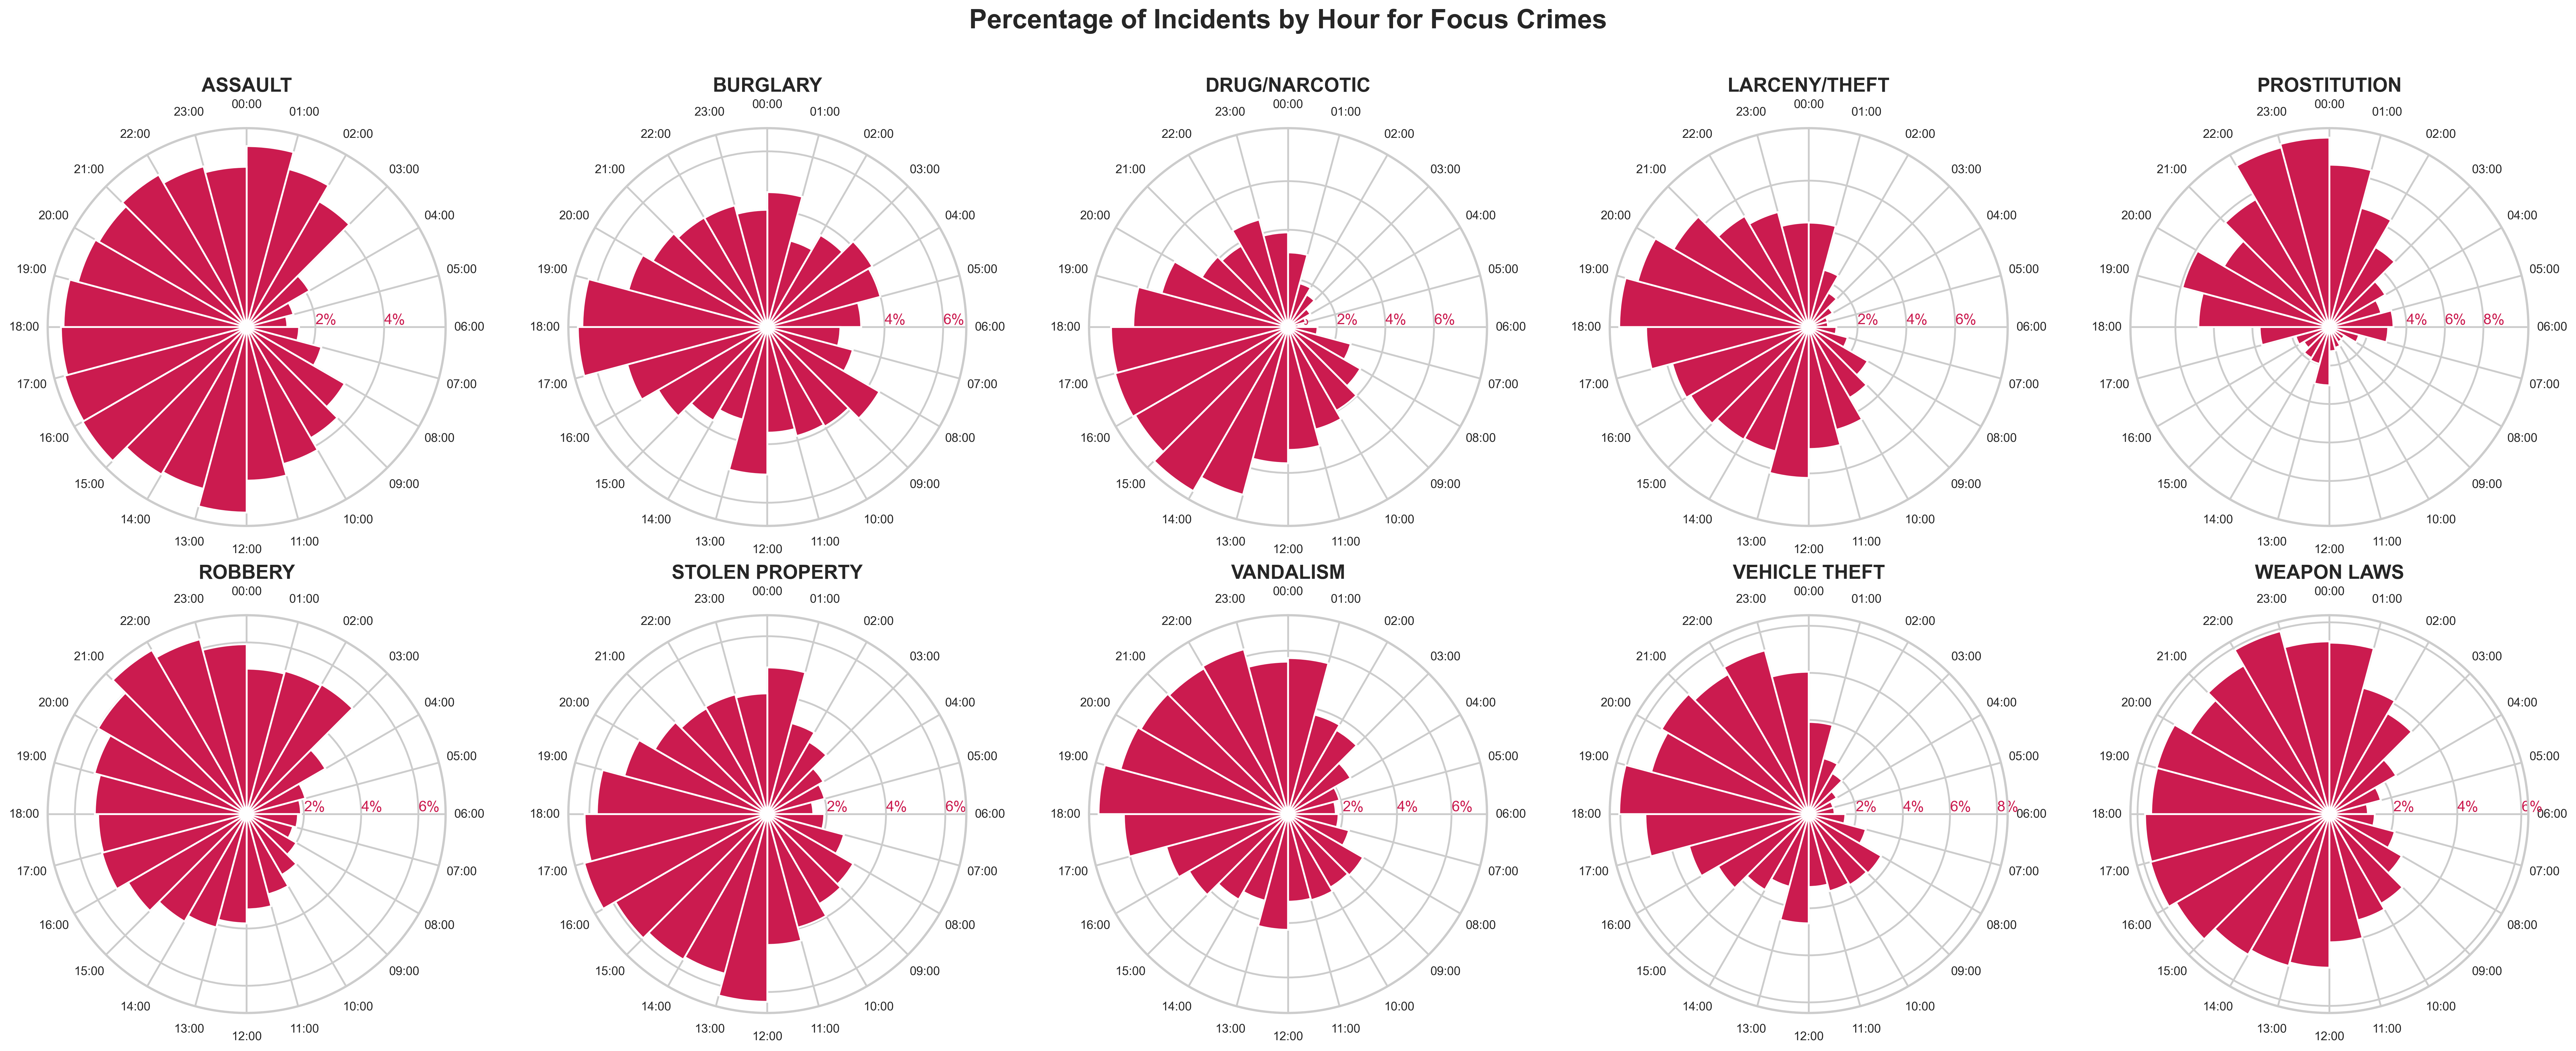

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# ------------------------#
# Global Plot Configuration
# ------------------------#
plt.rcParams['figure.dpi'] = 300  # High-resolution rendering
sns.set_context("talk", font_scale=1.1)  # Talk-like context for publications
sns.set_style("whitegrid")  # Clean grid style
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 10  # Reduced y-axis tick font size
})

# ------------------------#
# Data Preparation
# ------------------------#
# Define focus crimes
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
               'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'}

# Ensure 'Date' is datetime and convert 'Time' (format 'HH:MM') to datetime to extract hour
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Filter DataFrame for focus crimes only
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()

# Group by Category and Hour to count total incidents (across all days)
sum_hourly = (focuscrime_df.groupby(['Category', 'Hour'])
              .size()
              .reset_index(name='TotalCount'))

# Compute the total incidents per category and then percentage per hour
total_counts = (sum_hourly.groupby('Category')['TotalCount']
                .sum()
                .reset_index(name='CategoryTotal'))
sum_hourly = pd.merge(sum_hourly, total_counts, on='Category')
sum_hourly['PctCount'] = sum_hourly['TotalCount'] / sum_hourly['CategoryTotal'] * 100

# Map each hour (0-23) to its corresponding angle (0-2π)
sum_hourly['Angle'] = sum_hourly['Hour'] / 24 * 2 * np.pi

# ------------------------#
# Facet Grid Setup for Polar Plots
# ------------------------#
# Sort categories for consistent facet order
categories = sorted(focuscrimes)
n_categories = len(categories)
n_cols = 5
n_rows = int(np.ceil(n_categories / n_cols))

# Create subplots with polar projection for each facet
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': 'polar'},
                         figsize=(n_cols * 6, n_rows * 6))
axes = axes.flatten()

# Color and bar width settings
rocket_color = sns.color_palette("rocket", 1)[0]
bar_width = 2 * np.pi / 24  # Each bar spans one hour

# Formatter to show tick labels as percentages
formatter = FuncFormatter(lambda x, pos: f'{x:.0f}%')

# Plot each facet
for i, cat in enumerate(categories):
    ax = axes[i]
    # Filter data for current category
    cat_data = sum_hourly[sum_hourly['Category'] == cat]
    
    # Ensure all 24 hours are represented; fill missing hours with 0%
    all_hours = pd.DataFrame({'Hour': np.arange(24)})
    all_hours['Angle'] = all_hours['Hour'] / 24 * 2 * np.pi
    cat_data = pd.merge(all_hours, cat_data, on=['Hour', 'Angle'], how='left')
    cat_data['PctCount'] = cat_data['PctCount'].fillna(0)
    
    # Create the polar bar plot
    ax.bar(cat_data['Angle'], cat_data['PctCount'], width=bar_width,
           align='edge', color=rocket_color)
    
    # Configure the polar axis to mimic a clock:
    ax.set_theta_zero_location('N')   # 00:00 at the top
    ax.set_theta_direction(-1)          # Clockwise
    
    # Set theta ticks for each hour formatted as "HH:00"
    ticks = np.linspace(0, 2 * np.pi, 24, endpoint=False)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{i:02d}:00" for i in range(24)], fontsize=10)
    
    # Enhance the radial axis (y-axis) appearance:
    ax.set_rlabel_position(90)  # Position at 06:00
    # Dynamically generate y-ticks in intervals of 2, stopping before exceeding max pct
    max_pct = cat_data['PctCount'].max()
    if max_pct < 2:
        tick_vals = [0, max_pct]
    else:
        tick_vals = np.arange(0, max_pct + 0.1, 2)  # 0.1 ensures inclusion if equal
    ax.set_yticks(tick_vals)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', labelsize=12, colors=rocket_color)
    
    # Set facet title with extra padding
    ax.set_title(cat, fontsize=16, fontweight='bold', pad=30)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global main title and radial axis label
fig.suptitle("Percentage of Incidents by Hour for Focus Crimes", fontsize=22, fontweight='bold', y=1.0)

plt.tight_layout()
plt.show()
